In [15]:
import random
from matplotlib import pyplot as plt
%matplotlib inline

# Cellular Automata without functions and classes

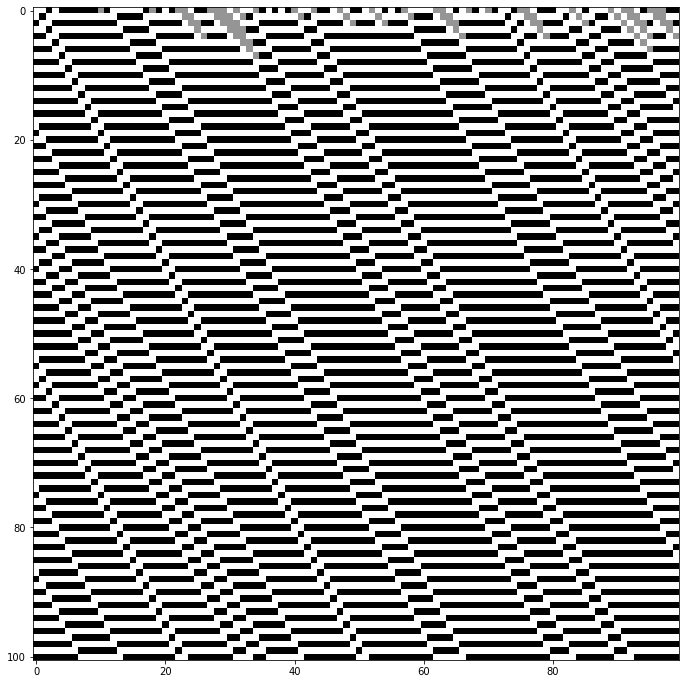

In [16]:
rule_number = 110
length = 100
time = 100

# make the initial condition
initial_condition = []
for i in range(length):
    initial_condition.append(random.randint(0,2))

# create list of neighborhood tuples in lex. order
neighborhoods = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1), (2,2)][::-1]

# convert the rule number to tri-nary and padd with 0s as needed
binary_base = tuple([3**(ind) for ind in range(len(neighborhoods))][::-1])
in_binary = []
input_rule = rule_number
if input_rule > 3**9-1:
    raise AssertionError('Input rule_number=%i, but the Rule Number should be within the range [0, 19682].'%input_rule)
for ind in binary_base:
    in_binary.append(input_rule//ind)
    input_rule = input_rule%ind
in_binary = tuple(in_binary)

# create the lookup table dictionary
lookup_table = {}
for i in range(9):
    key = neighborhoods[i]
    val = in_binary[i]
    lookup_table.update({key:val})
    
# initialize spacetime field and current configuration
spacetime_field = [initial_condition]
current_configuration = initial_condition.copy()

# apply the lookup table to evolve the CA for the given number of time steps
for t in range(time):
    new_configuration = []
    for i in range(len(current_configuration)):
        
        neighborhood = (current_configuration[(i-1)], 
                        current_configuration[i]) 
        
        new_configuration.append(int(lookup_table[neighborhood]))
        
    current_configuration = new_configuration
    spacetime_field.append(new_configuration)
    
# plot the spacetime field diagram
plt.figure(figsize=(12,12))
plt.imshow(spacetime_field, cmap=plt.cm.Greys, interpolation='nearest')
plt.show()

# Cellular Automata using functions and classes

In [17]:
def random_string(length):
    '''
    Returns a random bit string of the given length. 
    
    Parameters
    ----------
    length: int
        Posivite integer that specifies the desired length of the bit string.
        
    Returns
    -------
    out: list
        The random bit string given as a list, with int elements.
    '''
    if not isinstance(length, int) or length < 0:
        raise ValueError("input length must be a positive ingeter")
    return [random.randint(0,2) for _ in range(length)]

def get_lookup_table(rule_number):
    '''
    Returns the look-up table of the neighborhoods in dictionary

    Parameters
    ----------
    rule_number: int
        Integer between [0, 19682]
    
    Returns:
    out: list
        The rule of a given cell above and its left neighbor
    '''

    if not isinstance(rule_number, int) or rule_number>=3**9 or rule_number<0:
        raise ValueError("Input rule_number=%i, but it must be an integer between [0, 19682]."%rule_number)
    
    neighborhoods = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1), (2,2)][::-1]

    binary_base = [3**(ind) for ind in range(len(neighborhoods))][::-1]

    in_binary = []
    for ind in binary_base:
        in_binary.append(rule_number//ind)
        rule_number = rule_number%ind
    
    return dict(zip(neighborhoods, map(int, in_binary)))

In [18]:
class eca(object):
    '''
    Elementry cellular automata simulator with each pixel of [0,1,2]
    '''
    def __init__(self, rule_number, initial_condition):
        '''
        Initialize the simulator

        Parameters
        ----------
        rule_number: int
            Index of the rule number
        initial_conditions: list
            list with each entry of [0,1,2]
        
        Attributes
        ----------
        lookup_table: dict
            define the rules of CA
        initial: 1D array
            initial condition
        spacetime: 2D array
            2D array of the spacetime field created from the simulator
        current_configuration: 1D array
            the spatial configuration at current time
        '''
        for i in initial_condition:
            if i not in [0,1,2]:
                raise ValueError("Entries in the initial condition must be within [0,1,2].")
        
        self.lookup_table = get_lookup_table(rule_number)
        self.initial = initial_condition
        self.spacetime = [initial_condition]
        self.current_configuration = initial_condition.copy()
        self._length = len(initial_condition)
    
    def evolve(self, times):
        '''
        Evolve the current configuration with given time steps

        Parameters
        ----------
        times: int
            number of steps to evolve
        '''

        if times<0:
            raise ValueError("times must be non-negative integers.")
        
        for _ in range(times):
            new_configuration = []
            for i in range(self._length):
        
                neighborhood = (self.current_configuration[(i-1)], 
                                self.current_configuration[i]) 
        
                new_configuration.append(int(self.lookup_table[neighborhood]))
        
            self.current_configuration = new_configuration
            self.spacetime.append(new_configuration)
        

In [19]:
def plot_spacetime(spacetime, fig_size=(12,12), c_map = plt.cm.Greys, start_time=0, end_time=None):
    '''
    Plot the simulated spacetime field

    Parameters
    ----------
    spacetime: 2D array
        spacetime field
    fig_size: tuple
        the size of the figure
    c_map: 
        color scheme of the plot
    start_time:
        starting time step for plot
        Default: initial time step
    end_time:
        end time step for plot
        Default: the last time step in the simulator
    '''
    plt.figure(figsize=fig_size)
    plt.imshow(spacetime[start_time:end_time], cmap = c_map, interpolation='nearest')
    plt.show()

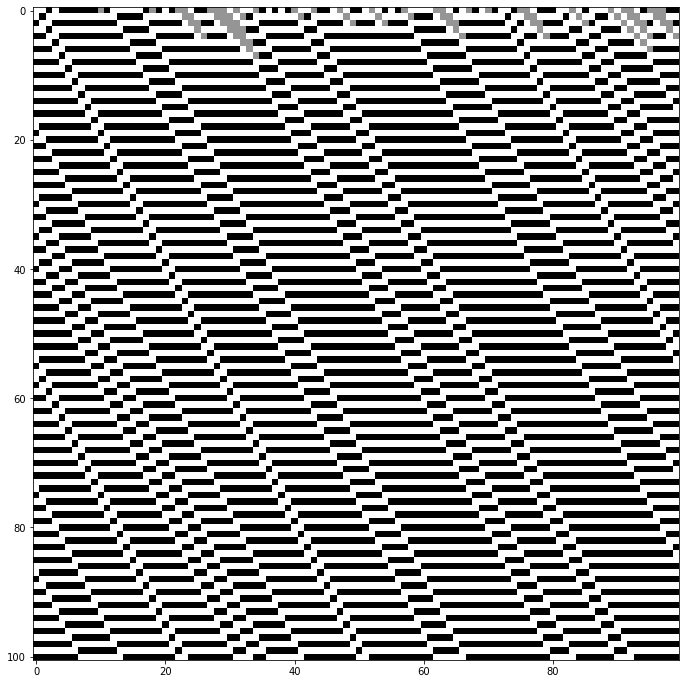

In [20]:
#test the codes using the same initial_condition as the codes wihtout functions and classes

rule_110 = eca(110, initial_condition)
rule_110.evolve(100)
plot_spacetime(rule_110.spacetime)

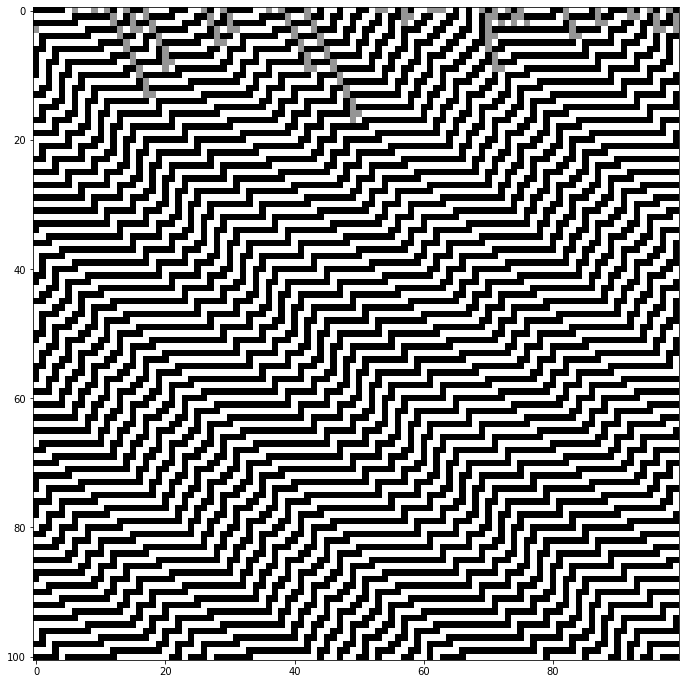

In [83]:
# Run with a new initial condition
rule_2510 = eca(2510, random_string(100))
rule_2510.evolve(100)
plot_spacetime(rule_2510.spacetime)

In [14]:
x = [[1,2,3,4],[5,6,7,8],[9,10,11,12]]
x[1:None]

[[5, 6, 7, 8], [9, 10, 11, 12]]